Conduction block with kHz stimulation
=====================================

In this example, we use NRV to replicate some results from the in-silico study from Bhadra et al. published in 2006. This is an example of propagation block with an mylinated axon (MRG model). 


(0.0, 1.1)

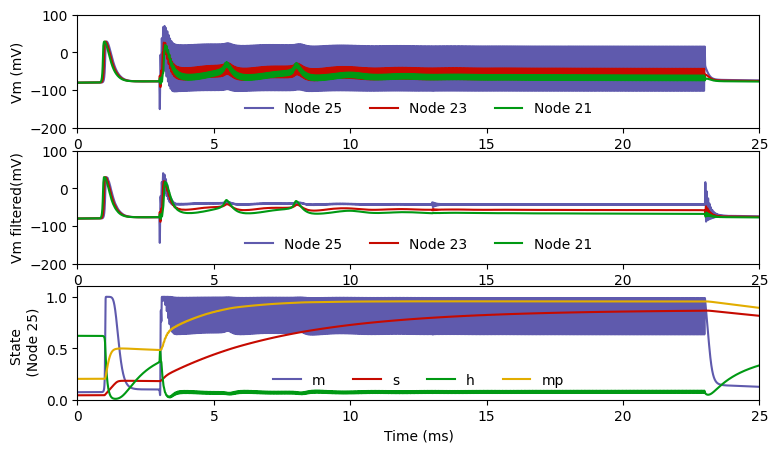

In [ ]:
import nrv
import matplotlib.pyplot as plt

if __name__ == '__main__':
    ########################
    ## PROBLEM DESCRITION ##
    ########################

    # Axon def
    y = 0                                                       # Axon y position, in [um]
    z = 0                                                       # Axon z position, in [um]
    d = 10                                                      # Axon diameter, in [um]
    L = nrv.get_length_from_nodes(d,51)                         # get length to have exactly 51 nodes

    dt = 0.001                                                  #time step in ms
    t_sim = 25                                                  #simulation  duration
    axon1 = nrv.myelinated(y,z,d,L,T=37,rec='nodes',dt=dt)      #Creation of an myelinated axon object 

    # first test pulse
    t_start = 0.5                                               #test pulse start in ms
    duration = 0.1                                              #test pulse duration in ms
    amplitude = 10                                              #test pulse amplitude in nA
    axon1.insert_I_Clamp(0, t_start, duration, amplitude)       #attach the test pulse to the axon

    # Block electrode
    x_elec = axon1.x_nodes[25]                                  #x-elect PSA is aligned with the 25th axon's NoR
    y_elec = 1000                                               #axon-to-PSA distance is 1000um
    z_elec = 0                                                  #z-elec position in um
    E = nrv.point_source_electrode(x_elec,y_elec,z_elec)        #creation of a PSA object

    #creation of a sinus stimulus object
    stim = nrv.stimulus() 
    #stimulus Block
    block_start=3                                               #KES block start in ms
    block_amp=700                                               #KES block amplitude in uA
    block_freq=20                                               #KES block frequency in kHz
    block_duration=20                                           #KES duration
    stim.sinus(block_start, block_duration, block_amp, block_freq,dt=dt)

    ### define nrv extra-cellular stimulation
    epineurium = nrv.load_material('endoneurium_bhadra')        #set the epineurium conductivity
    extra_stim = nrv.stimulation(epineurium)
    extra_stim.add_electrode(E, stim)

    axon1.attach_extracellular_stimulation(extra_stim) #the extracellular context is attached the axon 

    ################
    ## SIMULATION ##
    ################
    results = axon1.simulate(t_sim=t_sim, record_particles=True,record_I_ions=True)  #axon is simulated accordingly - results are saved as a dict

    #####################
    ## POST PROCESSING ##
    #####################

    # filter the result to remove 10kHz artefacts
    results.filter_freq('V_mem',block_freq)

    color_1 = "#1B148A"
    color_2 = "#C60A00"
    color_3 = "#009913"
    color_4 = "#E2AD00"

    fig, axs = plt.subplots(3)
    fig.set_size_inches(8.8, 5)
    axs[0].plot(results['t'],results['V_mem'][25],label='Node 25',color = color_1,alpha = 0.7)
    axs[0].plot(results['t'],results['V_mem'][23],label='Node 23',color = color_2)
    axs[0].plot(results['t'],results['V_mem'][21],label='Node 21',color = color_3)
    axs[0].set_ylabel('Vm (mV)')
    axs[0].legend(loc='lower center',ncol = 3,frameon=False)
    axs[0].set_xlim(0,25)
    axs[0].set_ylim(-200,100)

    axs[1].plot(results['t'],results['V_mem_filtered'][25],label='Node 25',color = color_1,alpha = 0.7)
    axs[1].plot(results['t'],results['V_mem_filtered'][23],label='Node 23',color = color_2)
    axs[1].plot(results['t'],results['V_mem_filtered'][21],label='Node 21',color = color_3)
    axs[1].set_ylabel('Vm filtered(mV)')
    axs[1].legend(loc='lower center',ncol = 3,frameon=False)
    axs[1].set_xlim(0,25)
    axs[1].set_ylim(-200,100)

    axs[2].plot(results['t'],results['m'][25],label='m',color = color_1,alpha = 0.7)
    axs[2].plot(results['t'],results['s'][25],label='s',color = color_2)
    axs[2].plot(results['t'],results['h'][25],label='h',color = color_3)
    axs[2].plot(results['t'],results['mp'][25],label='mp',color = color_4)
    axs[2].set_xlabel('Time (ms)')
    axs[2].set_ylabel('State \n (Node 25)')
    axs[2].legend(loc='lower center',ncol = 4,frameon=False)
    axs[2].set_xlim(0,25)
    axs[2].set_ylim(0,1.1)

    #plt.show()